In [739]:
import numpy as np
import pandas as pd
import sympy as sp
import math as m
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from IPython.display import Image
from scipy import integrate

In [740]:
sp.init_printing('mathjax')
tau, mu, du, dy = sp.symbols('tau mu du dy')

# Questão 1:

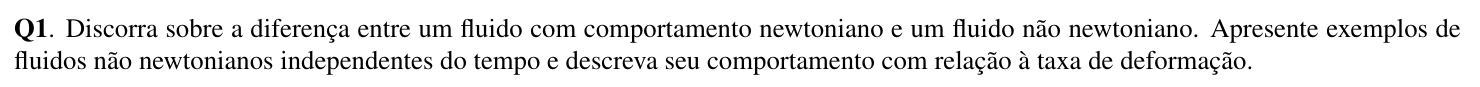

In [741]:
Image(filename="quest1.png")

### Resposta:
O Fluido Newtoniano é um fluido que apresenta uma relação linear e diretamente proporcional entre a tensão de cisalhamennto e a taxa de deformação apresentada, ou seja, a sua constante de proporcionalidade, a viscosidade dinâmica é constante no tempo, obedecendo a seguinte lei:

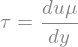

In [742]:
eq_newton = sp.Eq(tau, mu * du/dy)
eq_newton

E a viscosidade dinâmica é calculada como:

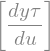

In [743]:
sp.solve(eq_newton, mu)

Os fluidos em geral podem ser classificados em 4 grupos (mas não apenas estes) em relação a sua reologia:
Grupo dos Fluidos Newtonianos:
Ex: Água, Óleos, Álcool, leite etc. todos os gases e líquidos não poliméricos e homogêneos estão nesta classificação.

Grupo dos Fluidos Pseduoplásticos:
Ex: polpa de frutas, caldos de fermentação, melaço de cana, etc;

Grupo dos Fluidos Dilatantes:
Ex: suspensões de amido, soluções de farinha de milho, açucar, e misturas de água silicatos, água e areia, etc.

Grupo dos Plásticos de Bingham:
Ex: Asfalto, Pixe, fluidos de perfuração de poços de petróleo, algumas suspenções concentradas de sólidos granulares, etc.

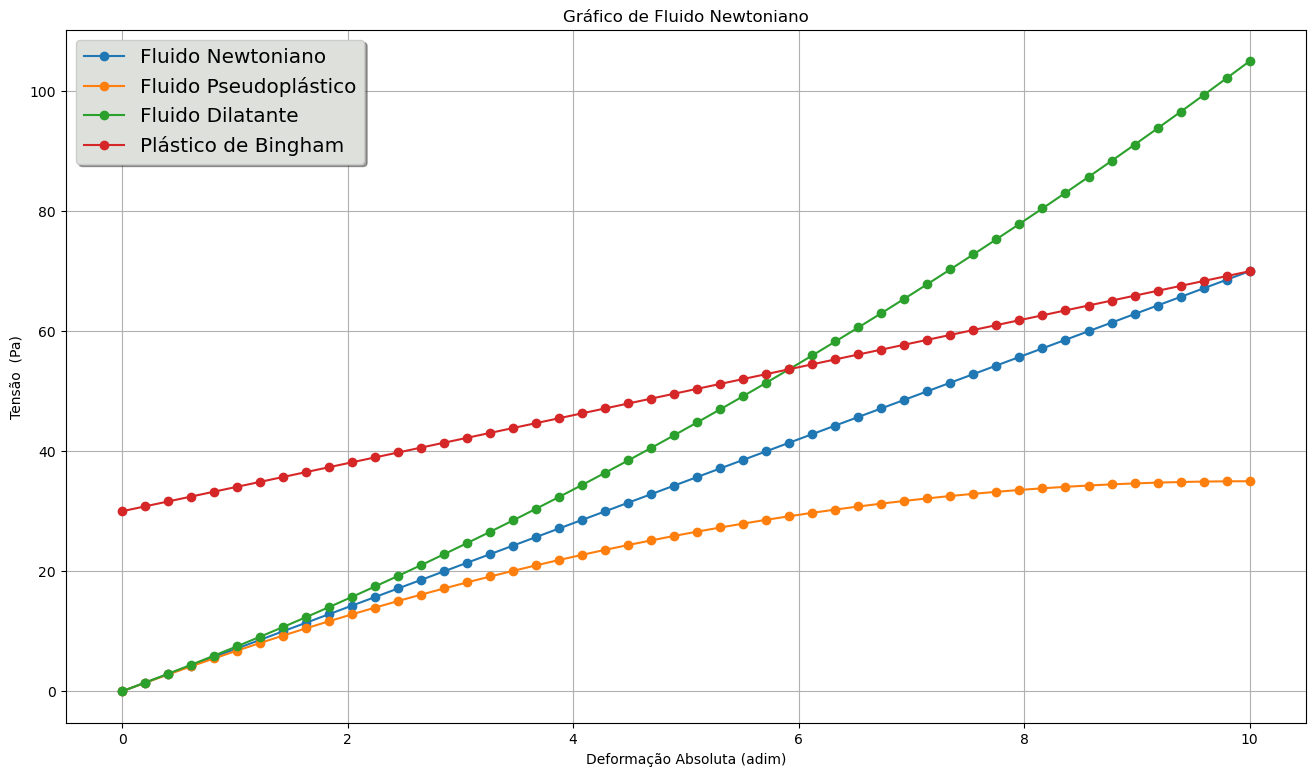

In [744]:
fig, ax = plt.subplots(figsize=(16,9))
x = np.linspace(0, 10, 50)
y = 7 *  x
z = -0.35 * x ** 2 + 7 * x
w = 0.35 * x ** 2 + 7 * x
u = 4 * x + 30
ax.set_xlabel('Deformação Absoluta (adim)')
ax.set_ylabel('Tensão  (Pa)')
plt.title("Gráfico de Fluido Newtoniano")
ax.plot(x, y, 'o-', label="Fluido Newtoniano")
ax.plot(x, z, 'o-', label="Fluido Pseudoplástico")
ax.plot(x, w, 'o-', label="Fluido Dilatante")
ax.plot(x, u, 'o-', label="Plástico de Bingham")
legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('#DEE0DC')
plt.grid(True)
plt.show()

# Questão 2

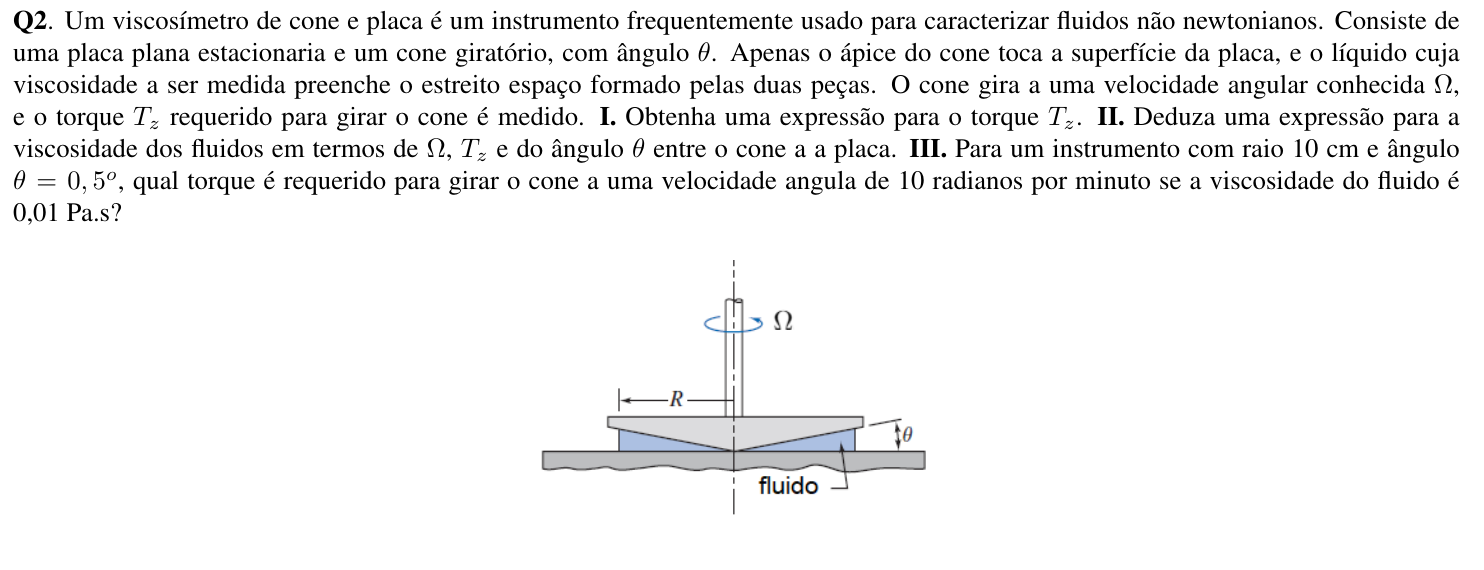

In [745]:
Image(filename="quest2.png")

### Considerações:
1. Regime Permanente
2. Fluido Newtoniano
3. Condição de Cisalhamento Simples

### Modelagem:

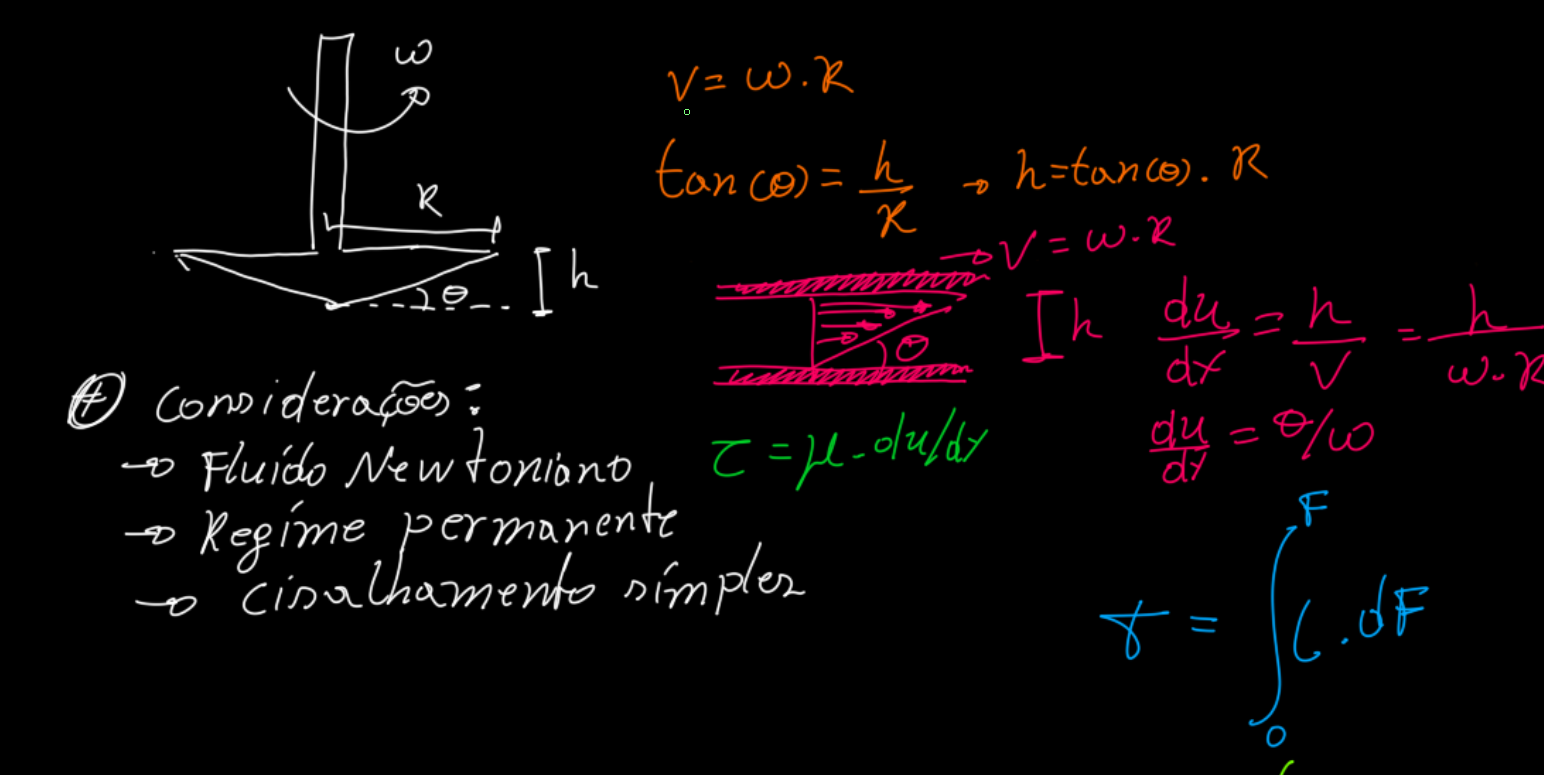

In [746]:
Image(filename="modelagem quest2.png")

### Equações:
Nesta situação, serão descritas as equações de:
1. Equação de Fluido Newtoniano
2. Equação de Tensão
3. Área de cisalhamento do viscosimetro
4. Razão entre o ângulo theta, a altura e a velocidade longo do raio da área de cisalhamento


In [747]:
h, omega, F, T, R, pi, theta, f, r = sp.symbols('h omega F T R pi theta f r')
A = sp.Function('A')(R)
eq_newton = sp.Eq(tau, mu * du/dy)          # Equação de fluido newtoniano
eq_tensao = sp.Eq(F, tau * sp.diff(A))      # Equação da tensão
area = sp.Eq(A, pi * R ** 2)                # Área de Cisalhamento
dudy = sp.Eq(du / dy, theta / omega)        # relação du/dy

listadas as variáveis e as equações que utilizaremos, elas parecerão  da seguinnte forma no compilador:

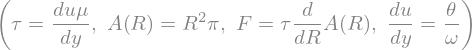

In [748]:
eq_newton, area, eq_tensao, dudy

sendo o diferencial de área para a integral é descrita como:

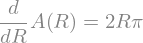

In [749]:
dA = sp.Eq(sp.diff(A), 2 * pi * R)
dA

Com todas as equações devidamente formuladas, realizamos as substituições necessárias para isolar o diferencial de força:

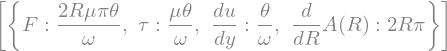

In [750]:
eq_forca_newton = sp.solve([eq_newton, eq_tensao, dA, dudy], [F, tau, sp.diff(A), du/dy], dict=True)
eq_forca_newton

finalmente, o diferencial de força em relação ao raio é dado por:

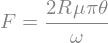

In [751]:
eq_final = eq_forca_newton[0]
forca = sp.Eq(F, eq_final.get(F))
forca

Desta forma, é possível substituir o diferencial de força na integral de torque, (F * R dR), realizando o processo de integração, temos a equação do torque gerado:

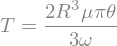

In [752]:
torque = sp.integrate(eq_final.get(F) * R, R)
sp.Eq(T,torque)

Dados utilizados:

In [753]:
theta = m.radians(0.5)  # valor de theta em radianos
R = 10e-2               # [m]
mu = 1e-2               # [Pa.s]
omega = 10              # [rad/min]
omega = omega/60        # [rad/s]
pi = m.pi               # pi

Por último, realizar as substituições na equação de torque obtida através da modelagem do problema:

In [754]:
valor_torque = torque.subs({
    'R':R,
    'mu':mu,
    'pi':pi,
    'theta':theta,
    'omega':omega
})
print('O valor do torque gerado é de {:.3e}N.m'.format(valor_torque))

O valor do torque gerado é de 1.097e-6N.m


# Questão 3

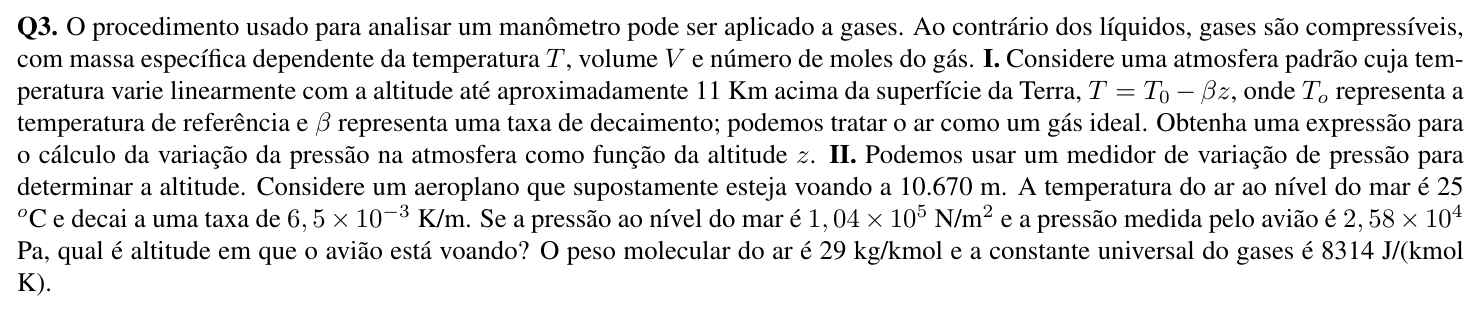

In [755]:
Image(filename='quest3.png')

### Dados Obtidos:

In [756]:
z, n, R, v, mass, M, g, P = sp.symbols('z n R v mass M g P')
T = sp.Function('T')(z)
rho_ar = sp.Function('rho_ar')(z)

h2 = 10670      #  [m]
h1 = 0          #  [m]
T1 = 298.15     #  [K] temperatura ao nível do mar h2
beta = -6.5e-3  #  [K/m] queda de temperatura com a altura
P1 = 1.04e5     #  [Pa] Pressão atm ao nível do mar
P2 = 2.58e4     #  [Pa] Pressão atm medida no aviao


clayperon = sp.Eq(P * v, n * R * T)
rho_atm = sp.Eq(rho_ar, mass / v)
molar = sp.Eq(n, mass / M)

### Considerações:
1. Regime permanente
2. Fluido Compressivel
3. Fluido Newtoniano
4. Gás ideal
5. A curva de temperatura em relação a altitude é linear

Primeiro, tentaremos descobrir a temperatura do ar em relação a altitude de voo apresentada.
Tal equação da temperatura em relação ao tempo, foi parametrizada como uma função linear, onde obtivemos a seguinte estrutura:

In [757]:
Temperatura = sp.Eq(T, T1 + beta * z)
Temperatura

Substituindo h = 10670 m, obtemos:

In [758]:
Temperatura.subs({'z':h2})

In [759]:
T2 = 228.645    # [K]
T2

Agora, relacionaremos as equações dos gases ideais para obter a caracterização da variação da massa especifica do ar em relação a altitude apresentada
As equações:

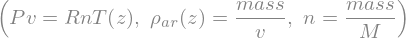

In [760]:
clayperon, rho_atm, molar

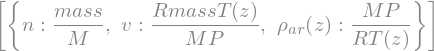

In [761]:
substitutions = sp.solve([clayperon, rho_atm, molar], [n, v, rho_ar], dict=True)
substitutions

In [762]:
dpdz = sp.Eq(P, -rho_ar * g)
dpdz

In [763]:
substitutions = substitutions[0]

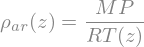

In [764]:
sp.Eq(rho_ar,substitutions.get(rho_ar))

Integrando a pressão em função da altitude, temos:

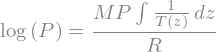

In [765]:
pressure_vs_z = sp.Eq(sp.integrate(1/P, P), sp.integrate(substitutions.get(rho_ar), z))
pressure_vs_z

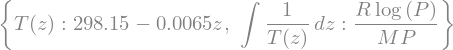

In [766]:
pressure_vs_z = sp.solve([pressure_vs_z, Temperatura], [sp.Integral(1 / T, z), T])
pressure_vs_z

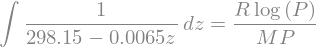

In [767]:
solve_integral = sp.Eq(sp.Integral(1/(T1 + beta * z), z), pressure_vs_z.get(sp.Integral(1 / T, z)))
solve_integral

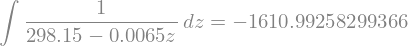

In [768]:
solve_integral.subs({
    'M': 29,          #  [kg/kmol]
    'R': 8314,        #  [j/kmol] constante dos gases ideais
    'g': 9.81,       #  [m/s]
    'P': P2/P1
})


In [769]:
sp.solve(sp.Integral(1/(T1 + beta * z), z), T)

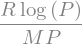

In [770]:
pressure_vs_z.get(sp.Integral(1 / T, z))

In [771]:
sp.Eq((sp.Integral(1/T,z)).subs(T), pressure_vs_z.get(sp.Integral(1 / T, z)))

ValueError: 
When a single argument is passed to subs it should be a dictionary of
old: new pairs or an iterable of (old, new) tuples.

In [ ]:
M = 29          #  [kg/kmol]
R = 8314        #  [j/kmol] constante dos gases ideais
g = 9.81        #  [m/s]

# Questão 4

In [ ]:
Image(filename='quest4.png')

### Análise:
O problema consiste nas pressões acumuladas das diferentes colunas de fluidos até o nível 'a', especificado, portanto temos:
1. coluna do líquido b com +0,9 m
2. coluna do líuido b com -0,4 m
3. coluna do líquido a com -0.25 m
4. coluna de água com 0,375 m

E as gravidades especificas, sendo:
1. rho_A = 1.20
2. rho_b = 0.75

In [ ]:
c_b1 = 0.9       # [m]
c_b2 = -0.4      # [m]
c_a1 = -0.25     # [m]
c_agua = 0.375   # [m]
SG_A = 1.20      # [m]
SG_B = 0.75      # [m]
Z, rho, g, P_a, P_b, P_agua, P_result = sp.symbols('Z rho g P_a P_b P_agua P_result')
P = sp.Function('P')(Z)

Trabalharemos com a variação da pressão em relação a coluna dágua, ue é dada por:

In [ ]:
dpdz = sp.Eq(sp.diff(P, Z), -rho * g)
dpdz

Realizaremos a somatória das pressões parciais de cada fluido, ou seja:
nota: o sentido adotado é "para baixo" ou seja, a pressão aumenta enquanto eu observo a profundidade da coluna

pressão do líquido B:

In [ ]:
P_liquidoB = sp.Eq(P_b, g * rho * SG_B * (c_b1 + c_b2))
P_liquidoB

Pressão do líuido A:

In [ ]:
P_liquidoA = sp.Eq(P_a, g * rho * SG_A * c_a1)
P_liquidoA

Pressão da coluna de água:

In [ ]:
P_Liquido_agua = sp.Eq(P_agua, g * rho * c_agua)
P_Liquido_agua

Com a soma de cada pressão parcial dos fluidos, é possível obter a pressão resultante:

In [ ]:
P_resultante = sp.Eq(P_result, P_a + P_b + P_agua)
P_resultante

In [ ]:
P_resultante = sp.solve([P_resultante, P_Liquido_agua, P_liquidoA, P_liquidoB], [P_a, P_b, P_agua, P_result])
P_resultante

Observamos que a pressão resultante equivale a uma coluna de 0.45 m de água:

In [ ]:
sp.Eq(P_result, P_resultante.get(P_result))

In [ ]:
P_resultante = P_resultante.get(P_result)
g = 9.81    # [m/s²]
rho = 1000   # [kg/m³]

Realizando as substituições dos valores da gravidade e da massa específica da água, temos:

In [ ]:
resultado = P_resultante.subs({
    'g': g,
    'rho': rho
})
print('A Pressão acumulada das colunas de fluidos é {:.2f} Pa'.format(resultado))